# Prophet-based time series model 

This markdown uses Prophet model and evaluates model performance by MAPE, MSE, and R square.


# import lib and data 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Load data 
df = pd.read_csv("prepared_sales_weather_event_data.csv", parse_dates=["Datum"])


# Clean and split data 

In [ ]:

# Sort by date for consistency
df = df.sort_values("Datum").reset_index(drop=True)

# Drop missing sales or category values
df = df.dropna(subset=["Umsatz", "Warengruppe", "TemperatureCategory", "CloudCategory", "WindCategory","Season", "IsHoliday_lib"])

# Create weekend indicator
df['IsWeekend'] = df['Datum'].dt.dayofweek.isin([5, 6]).astype(int)

print(f"Data date range: {df['Datum'].min()} to {df['Datum'].max()}")
print(f"Total records: {len(df)}")

# Dynamic data splitting based on percentages
df_sorted = df.sort_values('Datum').reset_index(drop=True)
n_total = len(df_sorted)

# Calculate split indices
train_idx = int(0.70 * n_total)
val_idx = int(0.90 * n_total)  # 70% + 20% = 90%

# Split the data
train_data = df_sorted.iloc[:train_idx].copy()
val_data = df_sorted.iloc[train_idx:val_idx].copy()
test_data = df_sorted.iloc[val_idx:].copy()

print(f"\nTraining data: {len(train_data)} records ({train_data['Datum'].min()} to {train_data['Datum'].max()})")
print(f"Validation data: {len(val_data)} records ({val_data['Datum'].min()} to {val_data['Datum'].max()})")
print(f"Test data: {len(test_data)} records ({test_data['Datum'].min()} to {test_data['Datum'].max()})")

# Prophet model 

15:28:13 - cmdstanpy - INFO - Chain [1] start processing


Data date range: 2013-07-01 00:00:00 to 2018-07-31 00:00:00
Total records: 9264

Training data: 6948 records (2013-07-01 00:00:00 to 2017-04-12 00:00:00)
Validation data: 1852 records (2017-04-12 00:00:00 to 2018-04-28 00:00:00)
Test data: 464 records (2018-04-28 00:00:00 to 2018-07-31 00:00:00)

Product categories: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0)]

TRAINING PROPHET MODELS
Training Prophet models for all categories...
Training Prophet model for Brot...


15:28:13 - cmdstanpy - INFO - Chain [1] done processing
15:28:13 - cmdstanpy - INFO - Chain [1] start processing


Training Prophet model for Brötchen...


15:28:13 - cmdstanpy - INFO - Chain [1] done processing
15:28:13 - cmdstanpy - INFO - Chain [1] start processing


Training Prophet model for Croissant...


15:28:14 - cmdstanpy - INFO - Chain [1] done processing
15:28:14 - cmdstanpy - INFO - Chain [1] start processing
15:28:14 - cmdstanpy - INFO - Chain [1] done processing


Training Prophet model for Konditorei...
Training Prophet model for Kuchen...


15:28:14 - cmdstanpy - INFO - Chain [1] start processing
15:28:14 - cmdstanpy - INFO - Chain [1] done processing
15:28:14 - cmdstanpy - INFO - Chain [1] start processing
15:28:14 - cmdstanpy - INFO - Chain [1] done processing


Training Prophet model for Saisonbrot...
Successfully trained models for 6 categories

Generating predictions...

VALIDATION SET EVALUATION - PROPHET MODEL

Brot (Category 1.0):
  MAPE: 87.5412
  MSE: 17652.8139
  RMSE: 132.8639
  R²: -7.7151
  MAE: 93.9463

Brötchen (Category 2.0):
  MAPE: 50.8366
  MSE: 48179.0703
  RMSE: 219.4973
  R²: -2.5159
  MAE: 187.8953

Croissant (Category 3.0):
  MAPE: 53.1945
  MSE: 10632.3220
  RMSE: 103.1132
  R²: -1.4203
  MAE: 75.8960

Konditorei (Category 4.0):
  MAPE: 128.9247
  MSE: 21645.9955
  RMSE: 147.1258
  R²: -28.2746
  MAE: 105.8695

Kuchen (Category 5.0):
  MAPE: 42.6439
  MSE: 21903.5531
  RMSE: 147.9985
  R²: -2.1346
  MAE: 112.5086

Saisonbrot (Category 6.0):
  MAPE: 103.6767
  MSE: 2584.6473
  RMSE: 50.8394
  R²: -1.7030
  MAE: 41.5780

OVERALL VALIDATION METRICS:
  MAPE: 73.3740
  MSE: 23473.5297
  RMSE: 153.2107
  R²: -0.4973
  MAE: 113.3984

TEST SET EVALUATION - PROPHET MODEL

Brot (Category 1.0):
  MAPE: 68.2773
  MSE: 17180.6283
  

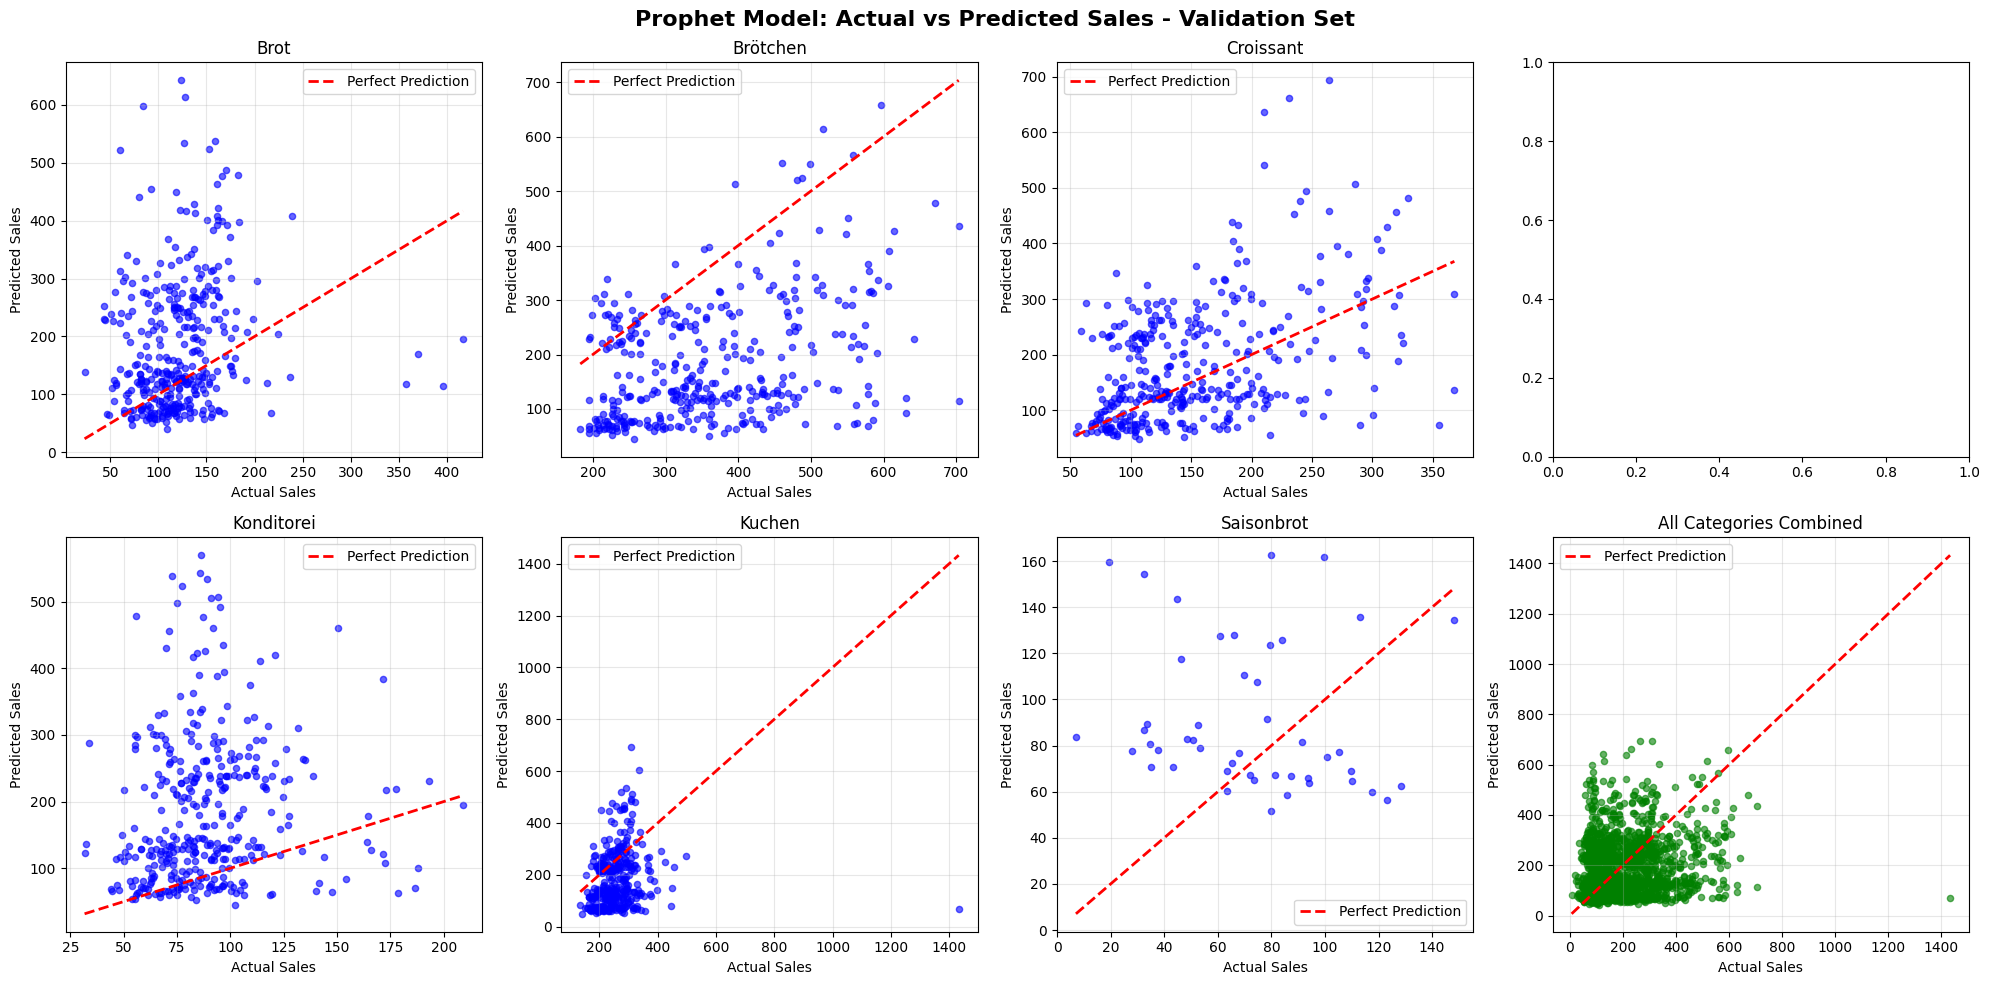

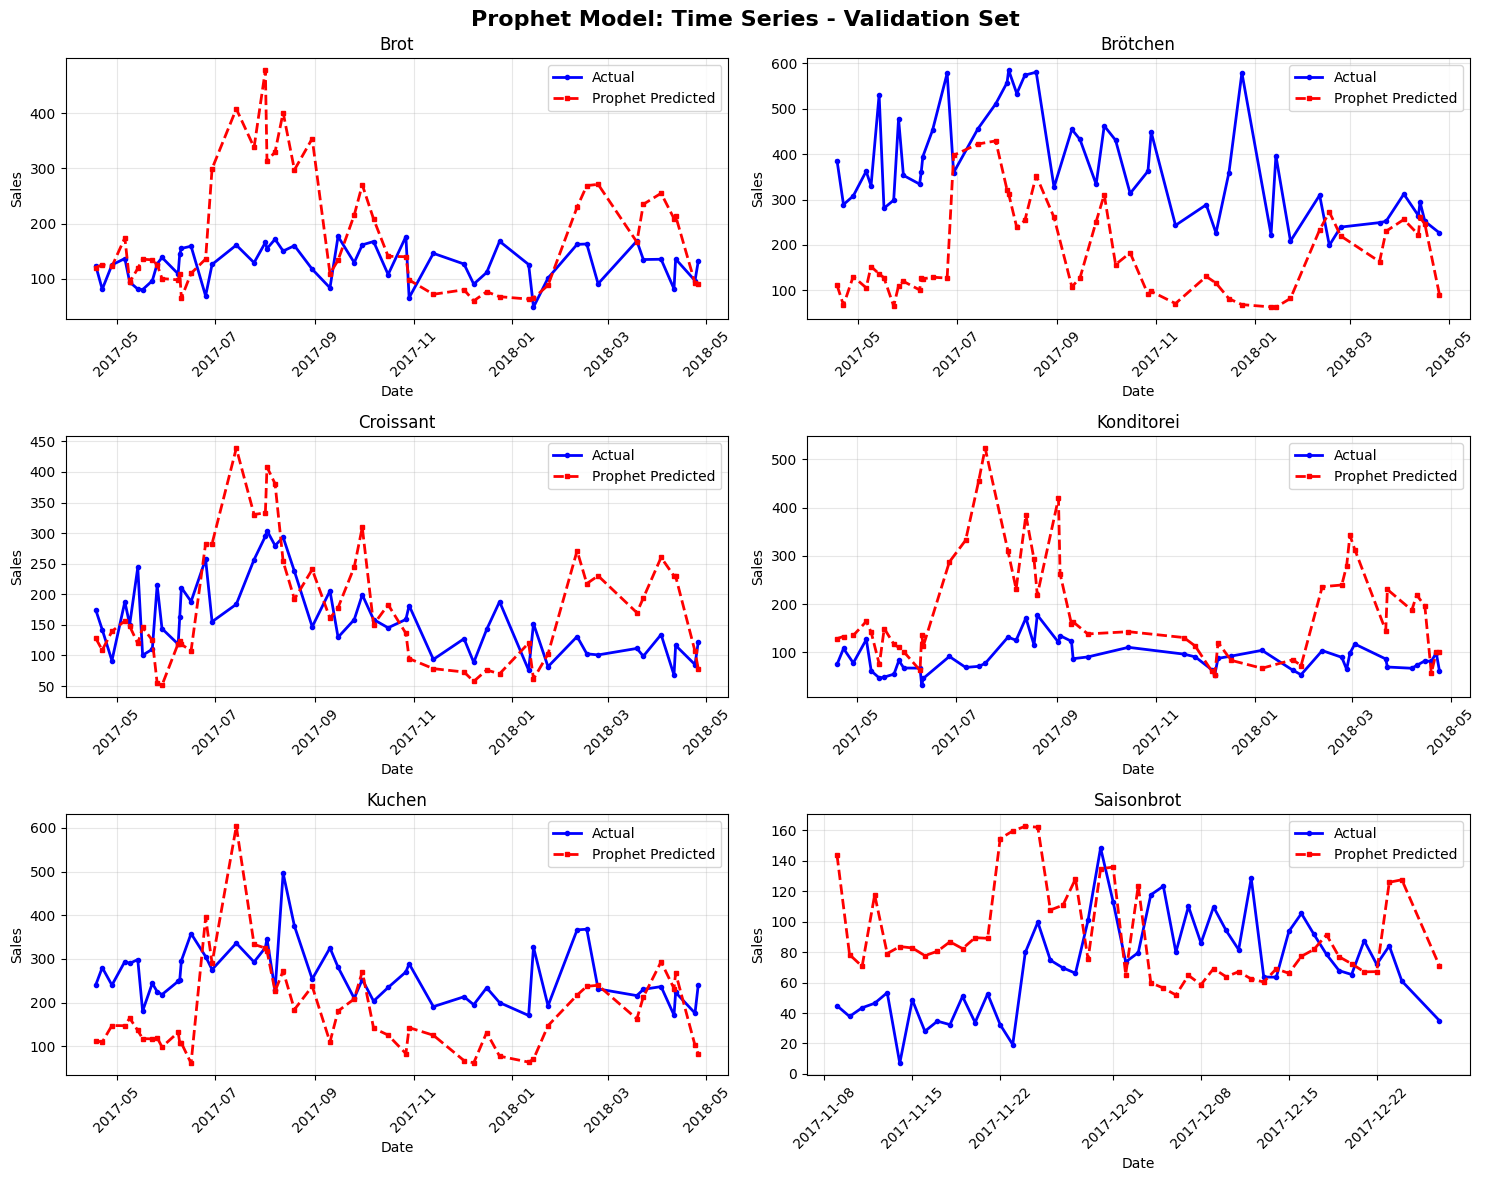

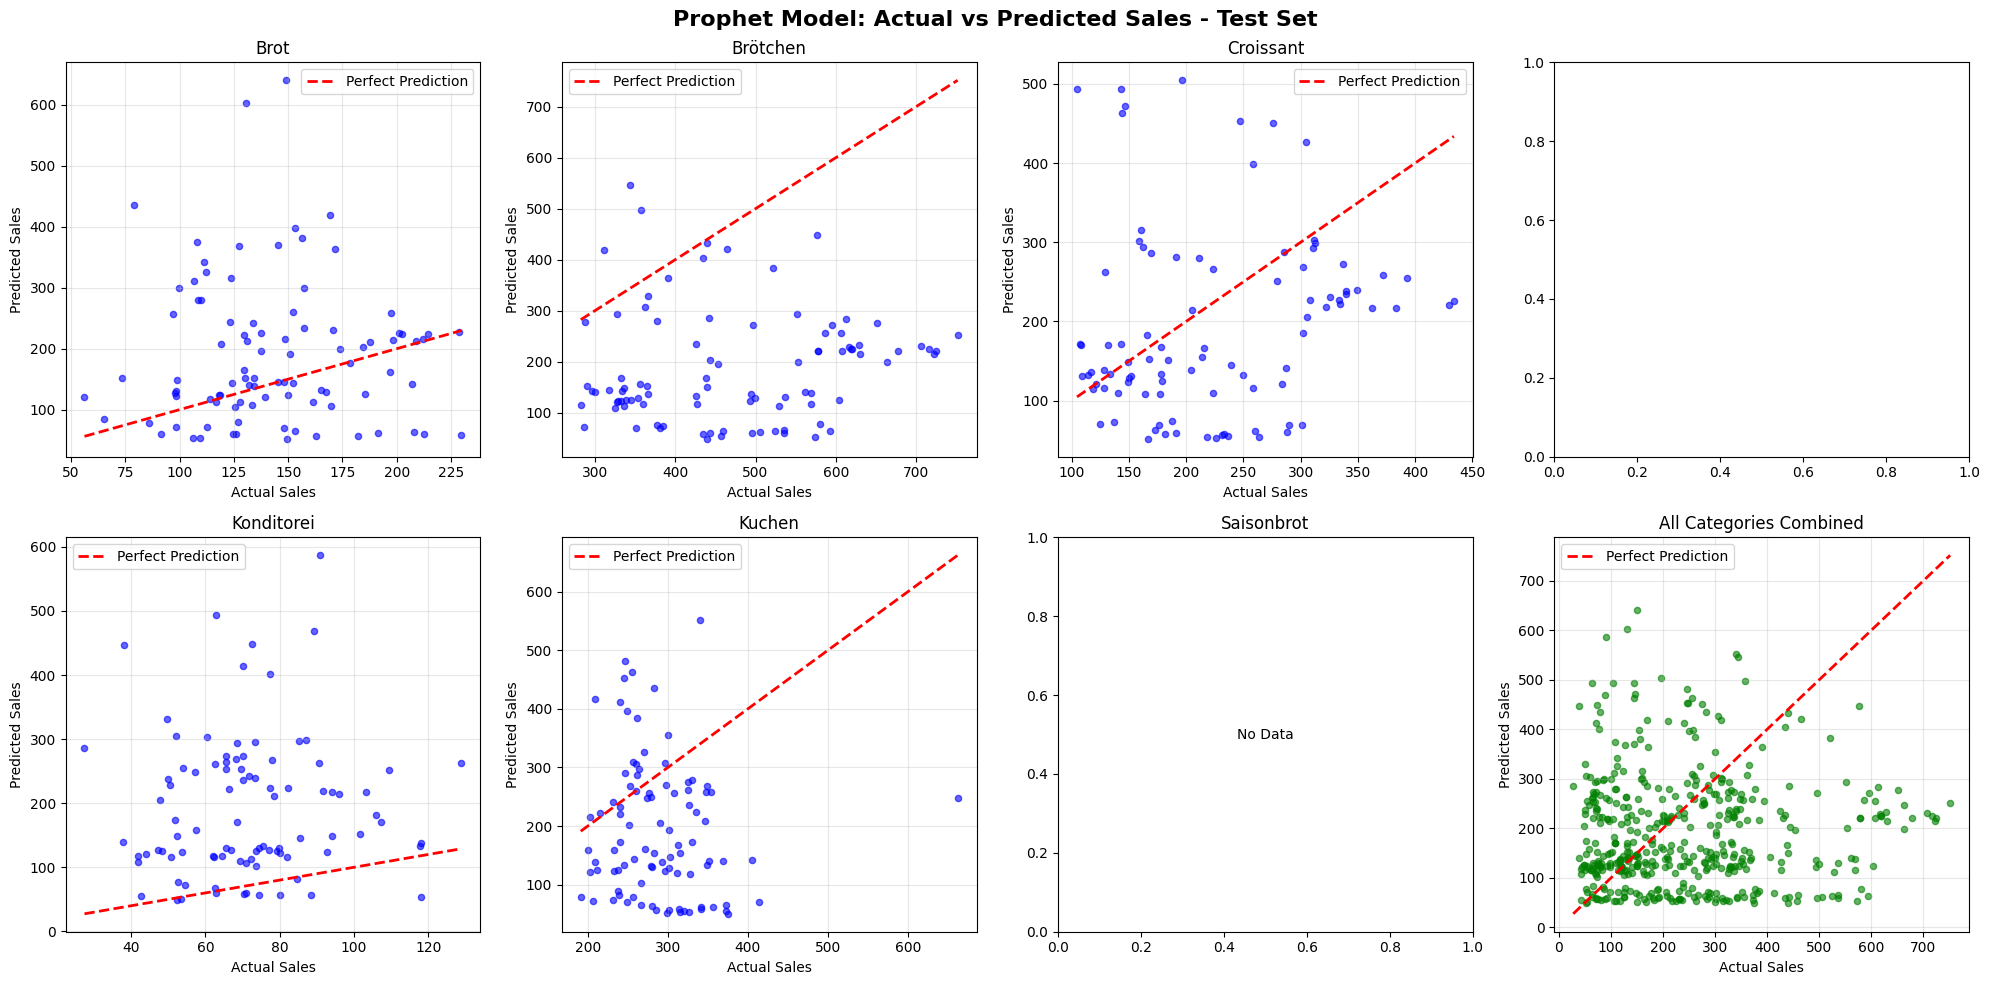

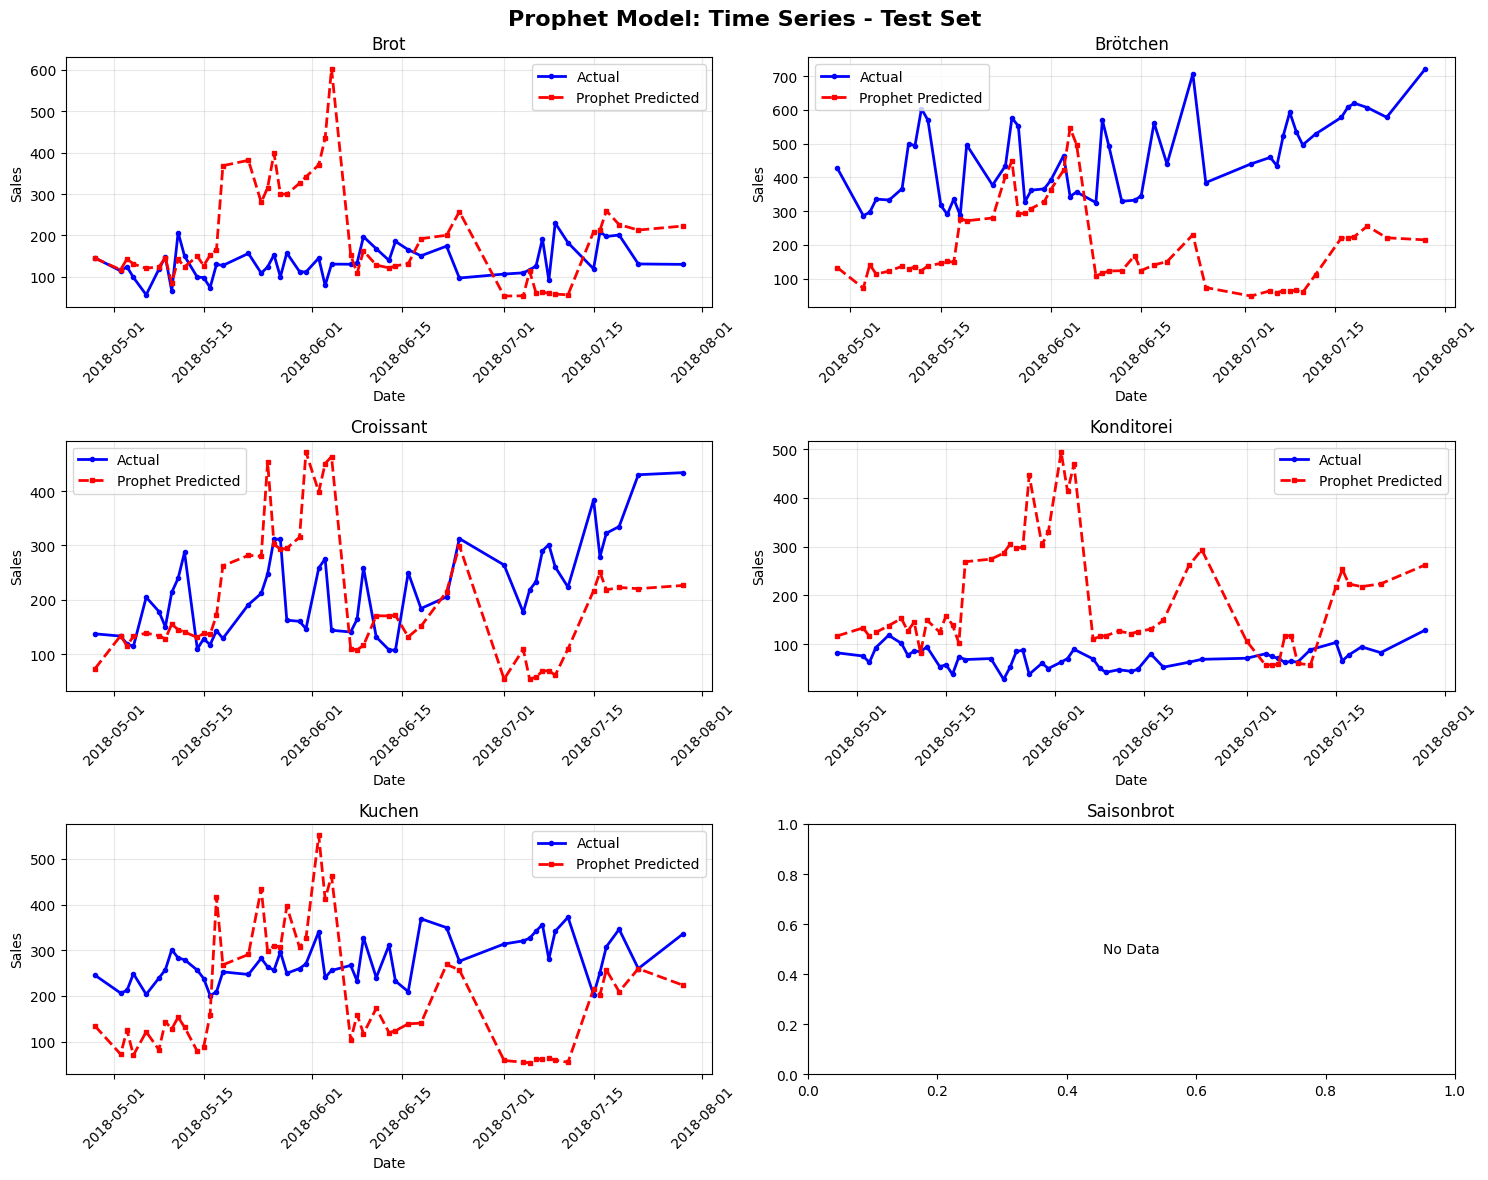


Generating Prophet component plots...


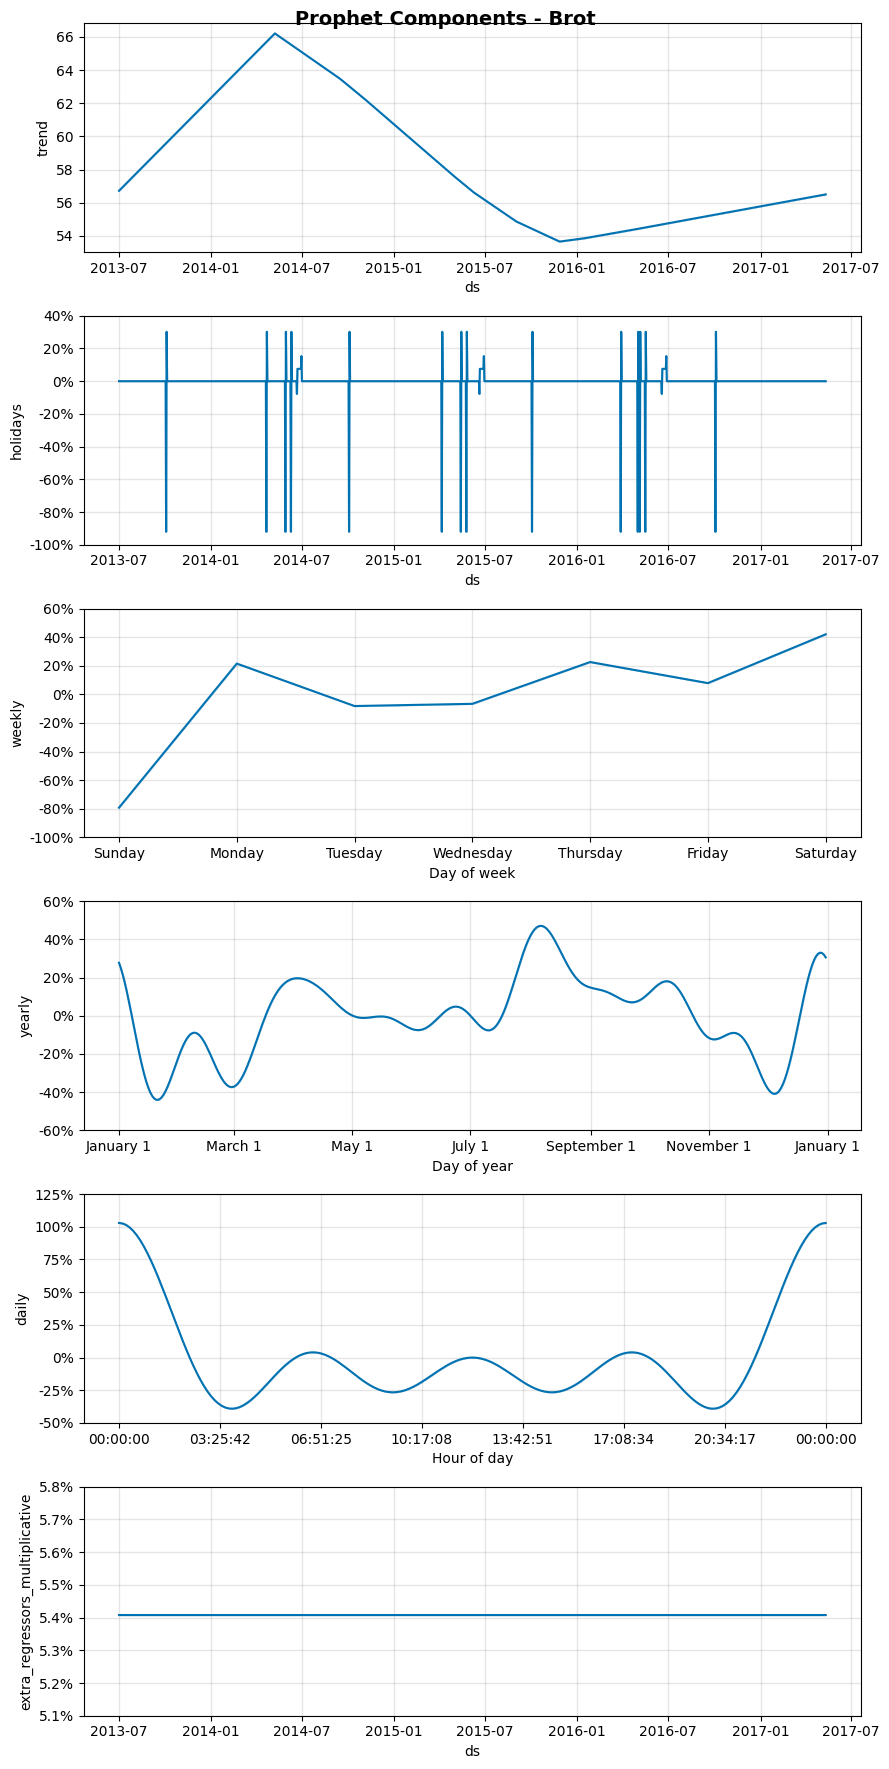

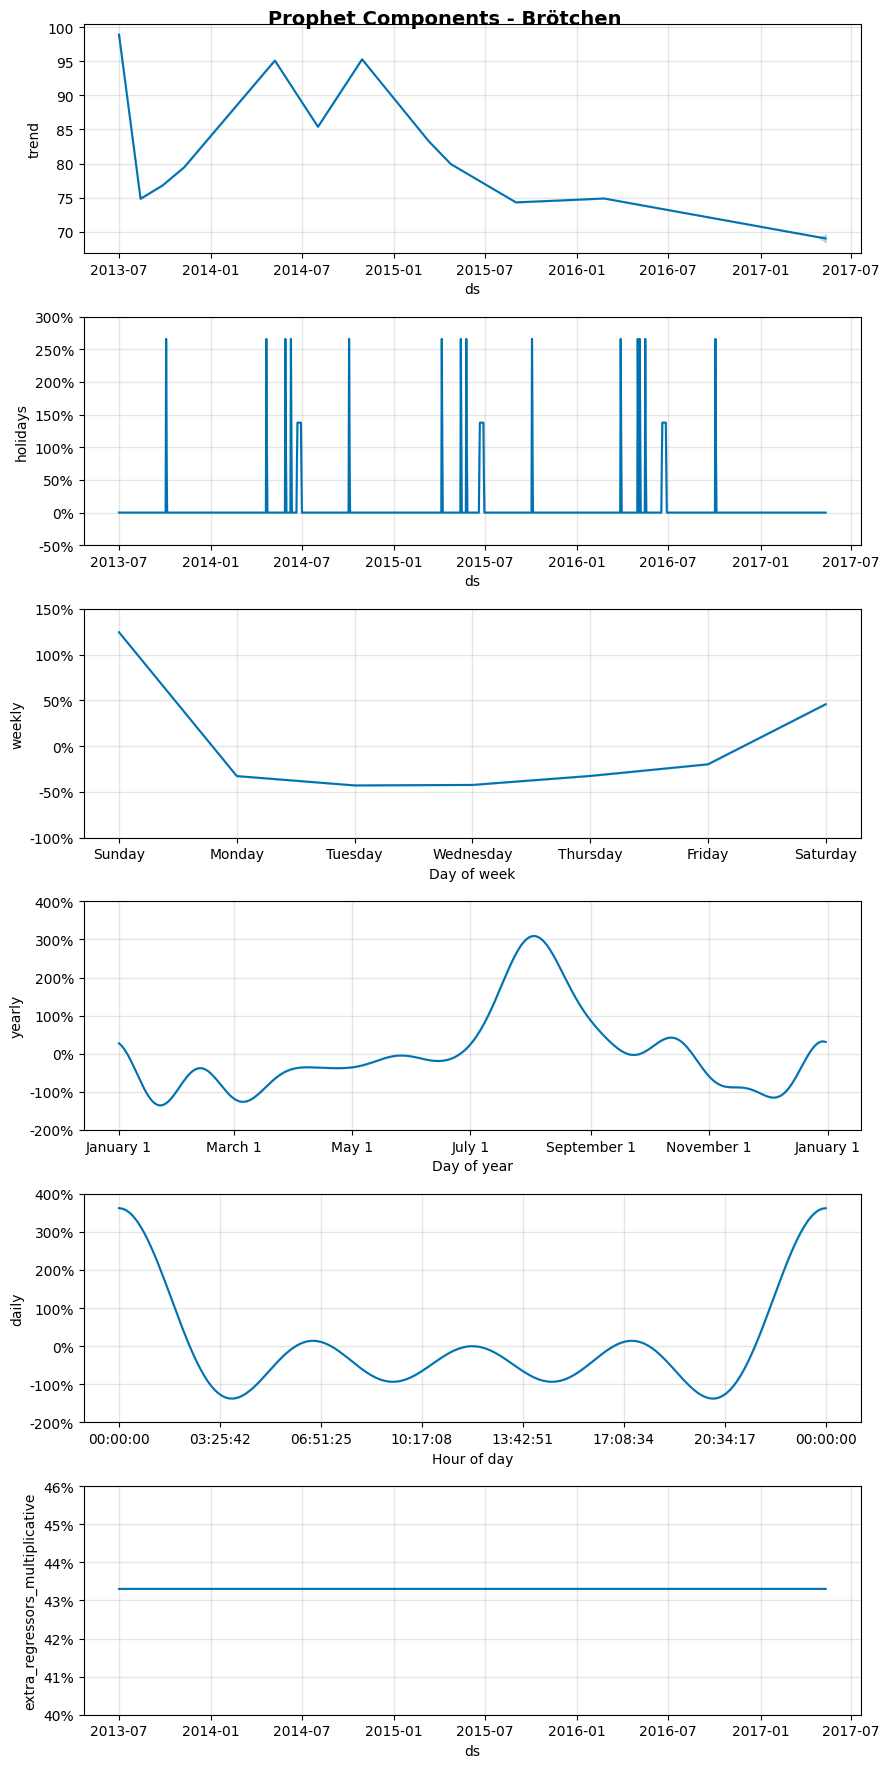

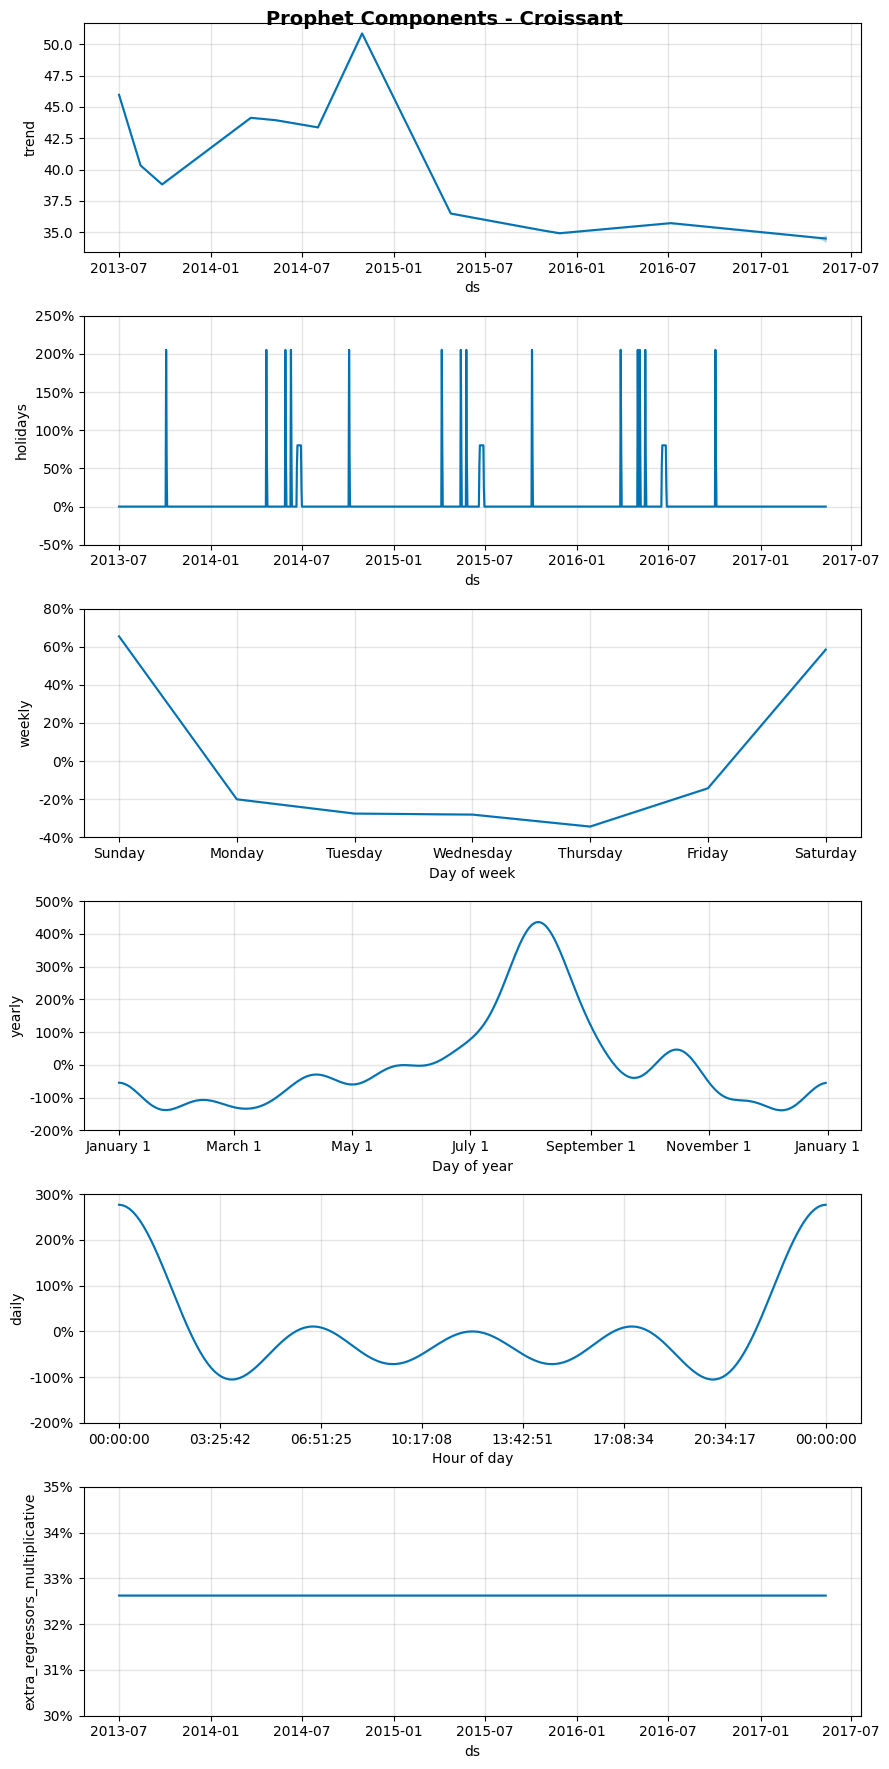


PROPHET MODEL PERFORMANCE SUMMARY
      Dataset  MAPE (%)         MSE      RMSE      R²       MAE
0  Validation   73.3740  23473.5297  153.2107 -0.4973  113.3984
1        Test   84.3046  38996.5643  197.4755 -0.6016  150.1295

PROPHET MODEL ANALYSIS COMPLETE

Prophet Model Features:
1. Automatic trend detection and changepoint analysis
2. Multiple seasonality patterns (daily, weekly, yearly)
3. Holiday effects (German holidays + Kieler Woche)
4. Custom regressors (weekend, seasonal indicators)
5. Multiplicative seasonality for better sales modeling
6. Uncertainty intervals and robust forecasting

Advantages over baseline:
- Handles complex seasonality patterns automatically
- Robust to missing data and outliers
- Incorporates holiday and special event effects
- Provides uncertainty quantification
- Better handles trend changes over time

Validation predictions saved to 'validation_predictions_prophet.csv'
Test predictions saved to 'test_predictions_prophet.csv'

PROPHET MODEL INSIGHTS

In [ ]:
# Get unique product categories
categories = sorted(df['Warengruppe'].unique())
category_names = {1: 'Brot', 2: 'Brötchen', 3: 'Croissant', 4: 'Konditorei', 5: 'Kuchen', 6: 'Saisonbrot'}
print(f"\nProduct categories: {categories}")

def calculate_metrics(y_true, y_pred):
    """Calculate evaluation metrics"""
    if len(y_true) == 0 or len(y_pred) == 0:
        return {
            'MAPE': float('nan'),
            'MSE': float('nan'),
            'RMSE': float('nan'),
            'R²': float('nan'),
            'MAE': float('nan')
        }
    
    # Handle zero values for MAPE calculation
    y_true_nonzero = y_true[y_true != 0]
    y_pred_nonzero = y_pred[y_true != 0]
    
    mape = mean_absolute_percentage_error(y_true_nonzero, y_pred_nonzero) * 100 if len(y_true_nonzero) > 0 else float('inf')
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    
    return {
        'MAPE': mape,
        'MSE': mse,
        'RMSE': np.sqrt(mse),
        'R²': r2,
        'MAE': mae
    }

class ProphetSalesModel:
    def __init__(self):
        self.models = {}
        self.category_names = {1: 'Brot', 2: 'Brötchen', 3: 'Croissant', 4: 'Konditorei', 5: 'Kuchen', 6: 'Saisonbrot'}
        
    def prepare_data_for_prophet(self, data, category=None):
        """Prepare data in Prophet format (ds, y)"""
        if category is not None:
            data = data[data['Warengruppe'] == category].copy()
        
        # Aggregate sales by date if we have multiple entries per date
        prophet_data = data.groupby('Datum').agg({
            'Umsatz': 'sum',
            'IsHoliday_lib': 'max',  # Keep holiday info
            'KielerWoche': 'max',    # Keep Kieler Woche info
            'IsWeekend': 'max',      # Keep weekend info
            'Season': 'first'        # Keep season info
        }).reset_index()
        
        # Rename columns for Prophet
        prophet_data = prophet_data.rename(columns={
            'Datum': 'ds',
            'Umsatz': 'y'
        })
        
        return prophet_data
    
    def create_holiday_dataframe(self, data):
        """Create holiday dataframe for Prophet"""
        holidays = []
        
        # Regular holidays
        holiday_dates = data[data['IsHoliday_lib'] == 1]['ds'].unique()
        for date in holiday_dates:
            holidays.append({'holiday': 'german_holiday', 'ds': pd.to_datetime(date), 'lower_window': 0, 'upper_window': 1})
        
        # Kieler Woche events
        kw_dates = data[data['KielerWoche'] == 1]['ds'].unique()
        for date in kw_dates:
            holidays.append({'holiday': 'kieler_woche', 'ds': pd.to_datetime(date), 'lower_window': 0, 'upper_window': 1})
        
        if len(holidays) > 0:
            return pd.DataFrame(holidays)
        else:
            return None
    
    def fit_category_model(self, train_data, category):
        """Fit Prophet model for a specific category"""
        print(f"Training Prophet model for {self.category_names[category]}...")
        
        # Prepare data
        prophet_data = self.prepare_data_for_prophet(train_data, category)
        
        if len(prophet_data) < 10:  # Need minimum data points
            print(f"Not enough data for {self.category_names[category]} (only {len(prophet_data)} points)")
            return None
        
        # Create holiday dataframe
        holidays_df = self.create_holiday_dataframe(prophet_data)
        
        # Initialize Prophet model
        model = Prophet(
            daily_seasonality=True,
            weekly_seasonality=True,
            yearly_seasonality=True,
            holidays=holidays_df,
            seasonality_mode='multiplicative',  # Better for sales data
            interval_width=0.8,
            changepoint_prior_scale=0.05,  # Control trend flexibility
            holidays_prior_scale=10.0,     # Boost holiday effects
        )
        
        # Add custom regressors
        model.add_regressor('IsWeekend')
        
        # Add seasonal regressors based on available seasons
        available_seasons = prophet_data['Season'].unique()
        for season in available_seasons:
            season_col = f'season_{season}'
            prophet_data[season_col] = (prophet_data['Season'] == season).astype(int)
            model.add_regressor(season_col)
        
        # Fit the model
        try:
            model.fit(prophet_data)
            return model
        except Exception as e:
            print(f"Error fitting model for {self.category_names[category]}: {str(e)}")
            return None
    
    def fit(self, train_data):
        """Fit Prophet models for all categories"""
        print("Training Prophet models for all categories...")
        
        self.models = {}
        for category in categories:
            model = self.fit_category_model(train_data, category)
            if model is not None:
                self.models[category] = model
        
        print(f"Successfully trained models for {len(self.models)} categories")
    
    def predict_category(self, data, category):
        """Make predictions for a specific category"""
        if category not in self.models:
            print(f"No model available for category {category}")
            return np.array([])
        
        # Prepare data
        prophet_data = self.prepare_data_for_prophet(data, category)
        
        if len(prophet_data) == 0:
            return np.array([])
        
        # Add seasonal regressors
        model = self.models[category]
        for regressor in model.extra_regressors.keys():
            if regressor.startswith('season_'):
                season = regressor.replace('season_', '')
                prophet_data[regressor] = (prophet_data['Season'] == season).astype(int)
        
        # Make predictions
        try:
            forecast = model.predict(prophet_data)
            predictions = forecast['yhat'].values
            
            # Ensure non-negative predictions
            predictions = np.maximum(predictions, 0)
            
            return predictions
        except Exception as e:
            print(f"Error predicting for category {category}: {str(e)}")
            return np.array([])
    
    def predict(self, data):
        """Make predictions for all categories"""
        all_predictions = []
        
        for category in categories:
            cat_data = data[data['Warengruppe'] == category].copy()
            if len(cat_data) > 0:
                predictions = self.predict_category(data, category)
                
                if len(predictions) > 0:
                    # Create prediction dataframe
                    pred_df = cat_data.groupby('Datum').first().reset_index()
                    pred_df = pred_df.head(len(predictions))  # Match prediction length
                    pred_df['predictions'] = predictions
                    pred_df['Warengruppe'] = category
                    
                    # Map back to original data structure
                    for idx, row in cat_data.iterrows():
                        date = row['Datum']
                        pred_row = pred_df[pred_df['Datum'] == date]
                        if len(pred_row) > 0:
                            prediction = pred_row['predictions'].iloc[0]
                        else:
                            prediction = 0
                        all_predictions.append(prediction)
                else:
                    all_predictions.extend([0] * len(cat_data))
            else:
                all_predictions.extend([0] * len(cat_data))
        
        return np.array(all_predictions)

# Initialize and train Prophet models
print("\n" + "="*60)
print("TRAINING PROPHET MODELS")
print("="*60)

prophet_model = ProphetSalesModel()
prophet_model.fit(train_data)

# Generate predictions
print("\nGenerating predictions...")
val_predictions = prophet_model.predict(val_data)
test_predictions = prophet_model.predict(test_data)

# Add predictions to dataframes
val_data_pred = val_data.copy()
val_data_pred['predictions'] = val_predictions[:len(val_data)]

test_data_pred = test_data.copy()
test_data_pred['predictions'] = test_predictions[:len(test_data)]

# Evaluate on validation set
print("\n" + "="*60)
print("VALIDATION SET EVALUATION - PROPHET MODEL")
print("="*60)

if len(val_data_pred) > 0:
    val_metrics_by_category = {}
    for category in categories:
        cat_data = val_data_pred[val_data_pred['Warengruppe'] == category]
        if len(cat_data) > 0:
            metrics = calculate_metrics(cat_data['Umsatz'], cat_data['predictions'])
            val_metrics_by_category[category] = metrics
            print(f"\n{category_names[category]} (Category {category}):")
            for metric, value in metrics.items():
                if not np.isnan(value) and not np.isinf(value):
                    print(f"  {metric}: {value:.4f}")
                else:
                    print(f"  {metric}: {value}")

    # Overall validation metrics
    val_overall_metrics = calculate_metrics(val_data_pred['Umsatz'], val_data_pred['predictions'])
    print(f"\nOVERALL VALIDATION METRICS:")
    for metric, value in val_overall_metrics.items():
        if not np.isnan(value) and not np.isinf(value):
            print(f"  {metric}: {value:.4f}")
        else:
            print(f"  {metric}: {value}")
else:
    print("No validation data available!")
    val_overall_metrics = {'MAPE': float('nan'), 'MSE': float('nan'), 'RMSE': float('nan'), 'R²': float('nan'), 'MAE': float('nan')}

# Evaluate on test set
print("\n" + "="*60)
print("TEST SET EVALUATION - PROPHET MODEL")
print("="*60)

if len(test_data_pred) > 0:
    test_metrics_by_category = {}
    for category in categories:
        cat_data = test_data_pred[test_data_pred['Warengruppe'] == category]
        if len(cat_data) > 0:
            metrics = calculate_metrics(cat_data['Umsatz'], cat_data['predictions'])
            test_metrics_by_category[category] = metrics
            print(f"\n{category_names[category]} (Category {category}):")
            for metric, value in metrics.items():
                if not np.isnan(value) and not np.isinf(value):
                    print(f"  {metric}: {value:.4f}")
                else:
                    print(f"  {metric}: {value}")

    # Overall test metrics
    test_overall_metrics = calculate_metrics(test_data_pred['Umsatz'], test_data_pred['predictions'])
    print(f"\nOVERALL TEST METRICS:")
    for metric, value in test_overall_metrics.items():
        if not np.isnan(value) and not np.isinf(value):
            print(f"  {metric}: {value:.4f}")
        else:
            print(f"  {metric}: {value}")
else:
    print("No test data available!")
    test_overall_metrics = {'MAPE': float('nan'), 'MSE': float('nan'), 'RMSE': float('nan'), 'R²': float('nan'), 'MAE': float('nan')}

# Visualization functions
def plot_prophet_results(data_pred, dataset_name):
    """Plot actual vs predicted for each category"""
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle(f'Prophet Model: Actual vs Predicted Sales - {dataset_name} Set', fontsize=16, fontweight='bold')
    
    # Individual category plots
    for i, category in enumerate(categories):
        row = i // 3
        col = i % 3
        
        cat_data = data_pred[data_pred['Warengruppe'] == category]
        
        if len(cat_data) > 0:
            axes[row, col].scatter(cat_data['Umsatz'], cat_data['predictions'], alpha=0.6, s=20, color='blue')
            axes[row, col].plot([cat_data['Umsatz'].min(), cat_data['Umsatz'].max()], 
                              [cat_data['Umsatz'].min(), cat_data['Umsatz'].max()], 
                              'r--', lw=2, label='Perfect Prediction')
            axes[row, col].set_xlabel('Actual Sales')
            axes[row, col].set_ylabel('Predicted Sales')
            axes[row, col].set_title(f'{category_names[category]}')
            axes[row, col].grid(True, alpha=0.3)
            axes[row, col].legend()
        else:
            axes[row, col].text(0.5, 0.5, 'No Data', ha='center', va='center', transform=axes[row, col].transAxes)
            axes[row, col].set_title(f'{category_names[category]}')
    
    # Overall plot
    axes[1, 3].scatter(data_pred['Umsatz'], data_pred['predictions'], alpha=0.6, s=20, color='green')
    axes[1, 3].plot([data_pred['Umsatz'].min(), data_pred['Umsatz'].max()], 
                   [data_pred['Umsatz'].min(), data_pred['Umsatz'].max()], 
                   'r--', lw=2, label='Perfect Prediction')
    axes[1, 3].set_xlabel('Actual Sales')
    axes[1, 3].set_ylabel('Predicted Sales')
    axes[1, 3].set_title('All Categories Combined')
    axes[1, 3].grid(True, alpha=0.3)
    axes[1, 3].legend()
    
    plt.tight_layout()
    plt.show()

def plot_prophet_time_series(data_pred, dataset_name, sample_days=50):
    """Plot time series for each category with Prophet predictions"""
    
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    fig.suptitle(f'Prophet Model: Time Series - {dataset_name} Set', fontsize=16, fontweight='bold')
    
    axes = axes.flatten()
    
    for i, category in enumerate(categories):
        cat_data = data_pred[data_pred['Warengruppe'] == category].copy()
        
        if len(cat_data) > 0:
            # Sample data for better visualization
            if len(cat_data) > sample_days:
                cat_data = cat_data.sample(sample_days, random_state=42)
            
            cat_data = cat_data.sort_values('Datum')
            
            axes[i].plot(cat_data['Datum'], cat_data['Umsatz'], 'b-', label='Actual', linewidth=2, marker='o', markersize=3)
            axes[i].plot(cat_data['Datum'], cat_data['predictions'], 'r--', label='Prophet Predicted', linewidth=2, marker='s', markersize=3)
            axes[i].set_title(f'{category_names[category]}')
            axes[i].set_xlabel('Date')
            axes[i].set_ylabel('Sales')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
            axes[i].tick_params(axis='x', rotation=45)
        else:
            axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(f'{category_names[category]}')
    
    plt.tight_layout()
    plt.show()

def plot_prophet_components(prophet_model, category, train_data):
    """Plot Prophet model components for a specific category"""
    if category not in prophet_model.models:
        print(f"No model available for category {category}")
        return
    
    model = prophet_model.models[category]
    
    # Prepare data for plotting
    prophet_data = prophet_model.prepare_data_for_prophet(train_data, category)
    
    # Add seasonal regressors
    for regressor in model.extra_regressors.keys():
        if regressor.startswith('season_'):
            season = regressor.replace('season_', '')
            prophet_data[regressor] = (prophet_data['Season'] == season).astype(int)
    
    # Create future dataframe for components
    future = model.make_future_dataframe(periods=30)  # Extend 30 days for better trend visualization
    
    # Add regressors to future dataframe
    # For simplicity, we'll use the last known values
    for regressor in model.extra_regressors.keys():
        if regressor in prophet_data.columns:
            # Use the mean value for future predictions
            future[regressor] = prophet_data[regressor].mean()
        else:
            future[regressor] = 0
    
    try:
        forecast = model.predict(future)
        
        # Plot components
        fig = model.plot_components(forecast)
        fig.suptitle(f'Prophet Components - {prophet_model.category_names[category]}', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error plotting components for {prophet_model.category_names[category]}: {str(e)}")

# Generate visualizations
print("\nGenerating Prophet model visualizations...")

# Validation set plots
if len(val_data_pred) > 0:
    plot_prophet_results(val_data_pred, "Validation")
    plot_prophet_time_series(val_data_pred, "Validation")

# Test set plots
if len(test_data_pred) > 0:
    plot_prophet_results(test_data_pred, "Test")
    plot_prophet_time_series(test_data_pred, "Test")

# Plot Prophet components for available models
print("\nGenerating Prophet component plots...")
for category in list(prophet_model.models.keys())[:3]:  # Show first 3 categories
    plot_prophet_components(prophet_model, category, train_data)

# Create summary comparison table
print("\n" + "="*80)
print("PROPHET MODEL PERFORMANCE SUMMARY")
print("="*80)

if not all(np.isnan(list(val_overall_metrics.values()))) or not all(np.isnan(list(test_overall_metrics.values()))):
    summary_df = pd.DataFrame({
        'Dataset': ['Validation', 'Test'],
        'MAPE (%)': [val_overall_metrics['MAPE'], test_overall_metrics['MAPE']],
        'MSE': [val_overall_metrics['MSE'], test_overall_metrics['MSE']],
        'RMSE': [val_overall_metrics['RMSE'], test_overall_metrics['RMSE']],
        'R²': [val_overall_metrics['R²'], test_overall_metrics['R²']],
        'MAE': [val_overall_metrics['MAE'], test_overall_metrics['MAE']]
    })
    
    print(summary_df.round(4))
else:
    print("No valid metrics to display in summary table.")

print("\n" + "="*80)
print("PROPHET MODEL ANALYSIS COMPLETE")
print("="*80)
print("\nProphet Model Features:")
print("1. Automatic trend detection and changepoint analysis")
print("2. Multiple seasonality patterns (daily, weekly, yearly)")
print("3. Holiday effects (German holidays + Kieler Woche)")
print("4. Custom regressors (weekend, seasonal indicators)")
print("5. Multiplicative seasonality for better sales modeling")
print("6. Uncertainty intervals and robust forecasting")
print("\nAdvantages over baseline:")
print("- Handles complex seasonality patterns automatically")
print("- Robust to missing data and outliers")
print("- Incorporates holiday and special event effects")
print("- Provides uncertainty quantification")
print("- Better handles trend changes over time")

# Save Prophet predictions
if len(val_data_pred) > 0:
    val_data_pred.to_csv('validation_predictions_prophet.csv', index=False)
    print("\nValidation predictions saved to 'validation_predictions_prophet.csv'")

if len(test_data_pred) > 0:
    test_data_pred.to_csv('test_predictions_prophet.csv', index=False)
    print("Test predictions saved to 'test_predictions_prophet.csv'")

# Feature importance analysis for Prophet models
print("\n" + "="*60)
print("PROPHET MODEL INSIGHTS")
print("="*60)
print("\nSuccessfully trained Prophet models for categories:")
for category, model in prophet_model.models.items():
    print(f"- {prophet_model.category_names[category]} (Category {category})")

print(f"\nTotal models trained: {len(prophet_model.models)} out of {len(categories)} categories")

if len(prophet_model.models) < len(categories):
    missing_categories = set(categories) - set(prophet_model.models.keys())
    print(f"Categories with insufficient data: {[category_names[cat] for cat in missing_categories]}")

print("\nModel Configuration:")
print("- Seasonality Mode: Multiplicative (better for sales data)")
print("- Daily, Weekly, and Yearly seasonality enabled")
print("- Custom holiday effects for German holidays and Kieler Woche")
print("- Weekend and seasonal regressors included")
print("- Changepoint detection for trend analysis")
print("- 80% prediction intervals generated")

